In [6]:
# Import all relevant packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set parameters of packages
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm, amsmath, siunitx}'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 15

In [7]:
# Constants
rho = 1000  # density in kg/m^3
g = 9.81  # gravitational acceleration in m/s^2
L = 1.99  # length in meters
z_r0 = 1.16  # reference height in meters

In [8]:
# Function to calculate P_0
def P_0(z_r, z_l, z_r0, L, rho, g):
    return rho * g * (z_r - z_l) * (1 - (L - z_r0) / (L - z_r))**-1


In [9]:
# Function to calculate P_0
def P_0_delta_z(delta_z, z_r, z_l, L, rho, g):
    return rho * g * (delta_z)**(-1) * (z_r - z_l) * (L - z_r)

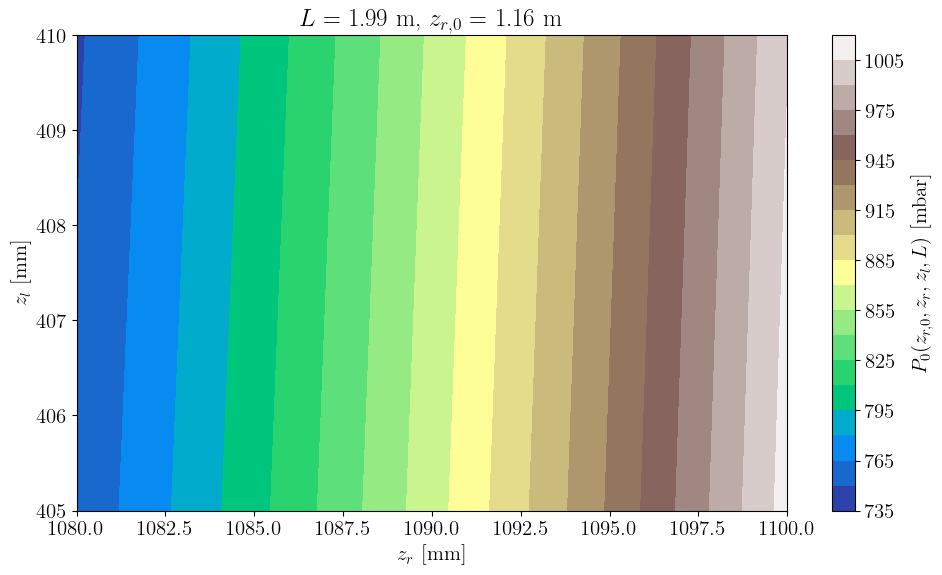

In [11]:
# Create a meshgrid for z_r and z_l
z_r = np.linspace(1.080, 1.100, 500)
z_l = np.linspace(0.405, 0.410, 500)
Z_r, Z_l = np.meshgrid(z_r, z_l)

# Calculate P_0 over the meshgrid
P = P_0(Z_r, Z_l, z_r0, L, rho, g) # Pressure in Pa = 0.01 mbar

# Plotting
plt.figure(figsize=(10, 6))
plt.title('$L$ = ' + f'{round(L,2)} m' + ', ' + '$z_{r,0}$ = ' + f'{round(z_r0,2)} m')
contour = plt.contourf(Z_r*1000, Z_l*1000, P/100, levels=20, cmap='terrain')
cbar = plt.colorbar(contour)
cbar.set_label('$P_0(z_{r,0}, z_r, z_l, L)$ [mbar]')
plt.xlabel('$z_r$ [mm]')
plt.ylabel('$z_l$ [mm]')
plt.tight_layout()
plt.savefig('colormap_theory.pdf')
plt.show()

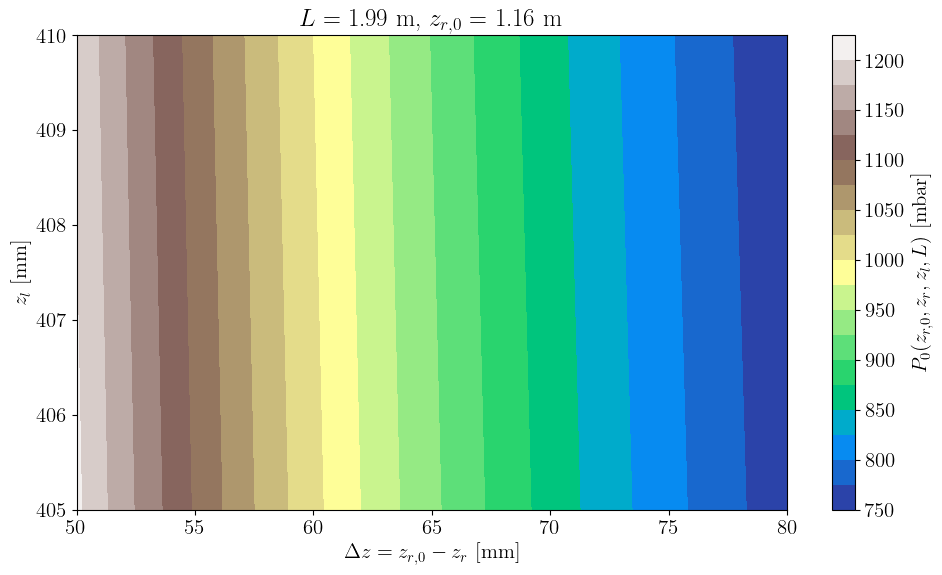

In [15]:
# Calculate delta z
delta_z = np.linspace(0.05, 0.08, 500)

# Create a meshgrid for z_r and z_l
z_r = np.linspace(1.080, 1.100, 500)
z_l = np.linspace(0.405, 0.410, 500)
Z_r, Z_l = np.meshgrid(z_r, z_l)

# Calculate P_0
P = P_0_delta_z(delta_z, Z_r, Z_l, L, rho, g) # Pressure in Pa = 0.01 mbar

# Plotting
plt.figure(figsize=(10, 6))
plt.title('$L$ = ' + f'{round(L,2)} m' + ', ' + '$z_{r,0}$ = ' + f'{round(z_r0,2)} m')
contour = plt.contourf(delta_z*1000, z_l*1000, P/100, levels=20, cmap='terrain')
cbar = plt.colorbar(contour)
cbar.set_label('$P_0(z_{r,0}, z_r, z_l, L)$ [mbar]')
plt.xlabel('$\Delta z = z_{r,0}- z_r$ [mm]')
plt.ylabel('$z_l$ [mm]')
plt.tight_layout()
plt.savefig('colormap_theory_1.pdf')
plt.show()